Importação do dataset

In [ ]:
###########################
import os

import pandas as pd
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rabieelkharoua/students-performance-dataset")

print("Path to dataset files:", path)

files = os.listdir(path)
print(files)

# Dados
# df = pd.read_csv("datasets/Student_performance_data_.csv")
df = pd.read_csv(f"{path}/Student_performance_data _.csv")

100%|██████████| 66.2k/66.2k [00:00<00:00, 37.4MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rabieelkharoua/students-performance-dataset/versions/2
['Student_performance_data _.csv']


In [ ]:
print(df.head())

# show columns
print(df.columns)

# Index(['StudentID', 'Age', 'Gender', 'Ethnicity', 'ParentalEducation',
#        'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport',
#        'Extracurricular', 'Sports', 'Music', 'Volunteering', 'GPA',
#        'GradeClass'],
#       dtype='object')


# Mapeamento das notas numéricas/conceitos
mapping = {
    0: 'A',  # GPA >= 3.5
    1: 'B',  # 3.0 <= GPA < 3.5
    2: 'C',  # 2.5 <= GPA < 3.0
    3: 'D',  # 2.0 <= GPA < 2.5
    4: 'F',  # GPA < 2.0
}

# Transformando a GradeClass em conceitos (A,B,..,F)
# E transformando em avaliação binária, entre bom/ruim - 1 ou 0
df['GradeClassLetter'] = df['GradeClass'].astype(int).map(mapping)
df['GradeBinary'] = df['GradeClass'].apply(lambda x: 1 if x in [0, 1, 2] else 0)


   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass GradeClassLetter  GradeBinary  
0             0  2.929196   

In [ ]:
# Impressão de valores únicos e/nulos
for column in df.columns:

    print(f"Coluna: {column}")

    uniques = df[column].unique()
    print("  Únicos:", uniques)

    null_count = df[column].isnull().sum()
    print("  Nulos:", null_count)

    # se for coluna de strings (object), conta '' e '   '
    if df[column].dtype == object:
        # exatas ''
        empty_str_count = (df[column] == '').sum()
        # só espaços (strip=='')
        blank_space_count = df[column].astype(str).str.strip().eq('').sum() - empty_str_count
        print("  Strings vazias (''):", empty_str_count)
        print("  Apenas espaços:", blank_space_count)

    print("-" * 40)

Coluna: StudentID
  Únicos: [1001 1002 1003 ... 3390 3391 3392]
  Nulos: 0
----------------------------------------
Coluna: Age
  Únicos: [17 18 15 16]
  Nulos: 0
----------------------------------------
Coluna: Gender
  Únicos: [1 0]
  Nulos: 0
----------------------------------------
Coluna: Ethnicity
  Únicos: [0 2 1 3]
  Nulos: 0
----------------------------------------
Coluna: ParentalEducation
  Únicos: [2 1 3 4 0]
  Nulos: 0
----------------------------------------
Coluna: StudyTimeWeekly
  Únicos: [19.83372281 15.40875606  4.21056977 ...  6.80549964 12.41665266
 17.81990749]
  Nulos: 0
----------------------------------------
Coluna: Absences
  Únicos: [ 7  0 26 14 17 10 22  1 11 15 21  9 16 29  2 25 20  5  8 12 27 23  3 13
  6 28  4 18 19 24]
  Nulos: 0
----------------------------------------
Coluna: Tutoring
  Únicos: [1 0]
  Nulos: 0
----------------------------------------
Coluna: ParentalSupport
  Únicos: [2 1 3 4 0]
  Nulos: 0
----------------------------------------
Col

BoxPlot para verificação de outliers

         StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min

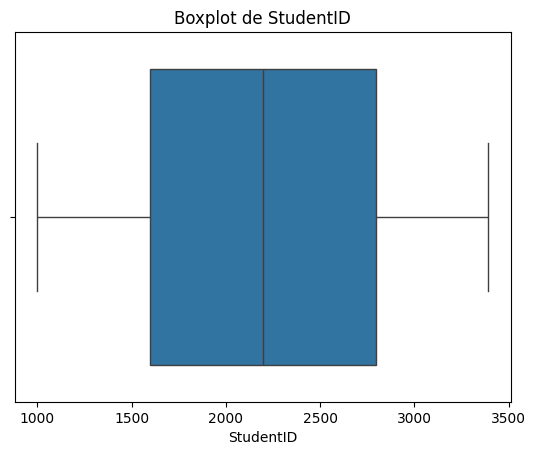

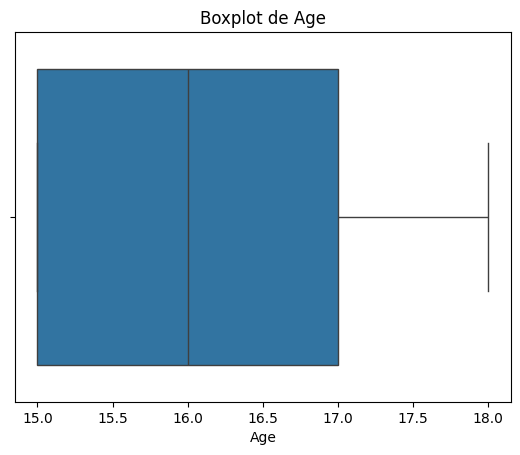

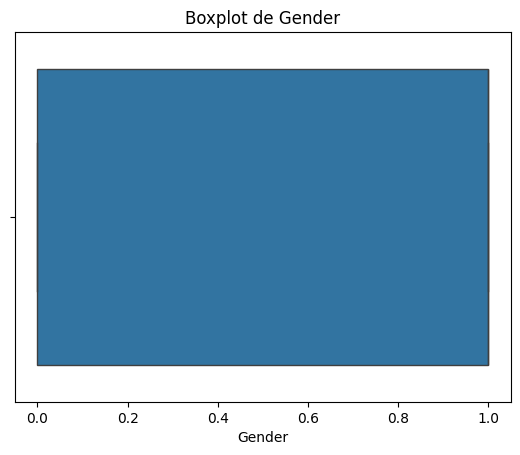

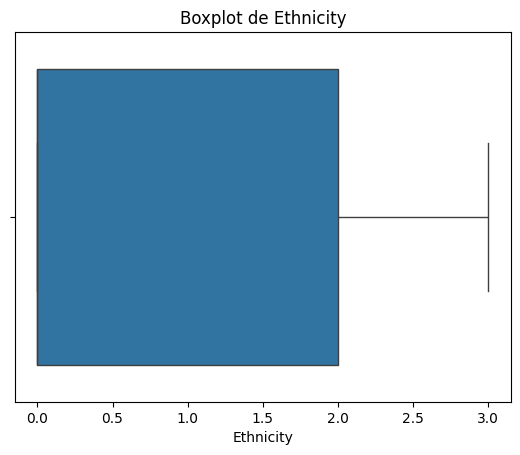

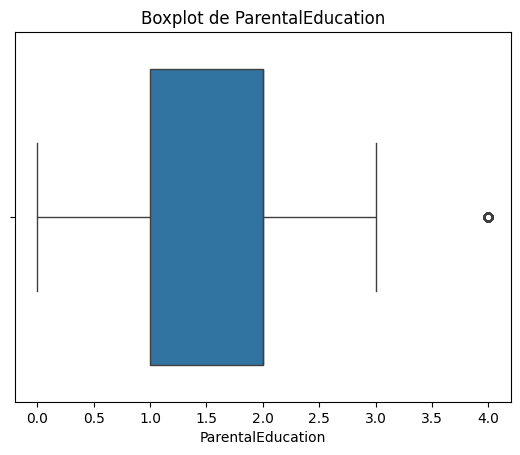

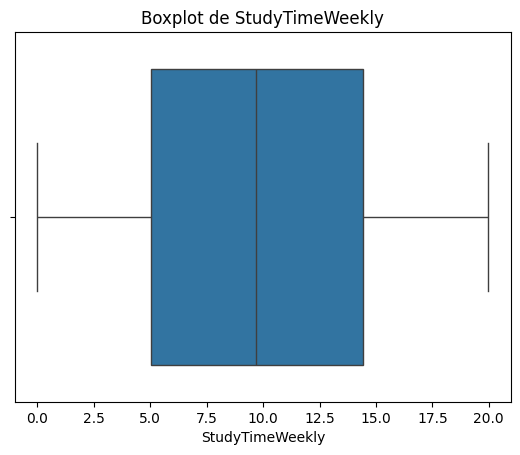

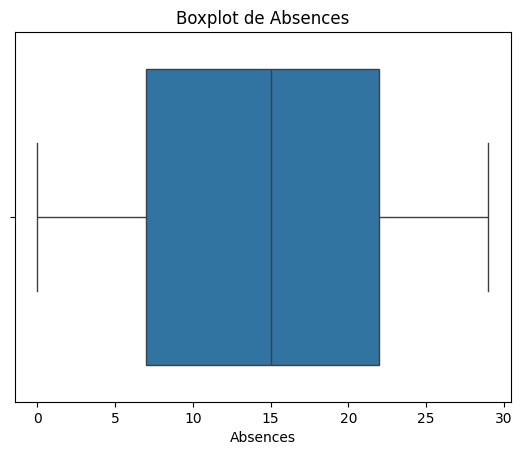

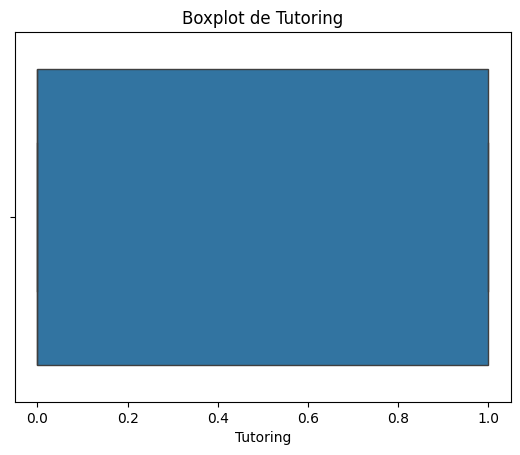

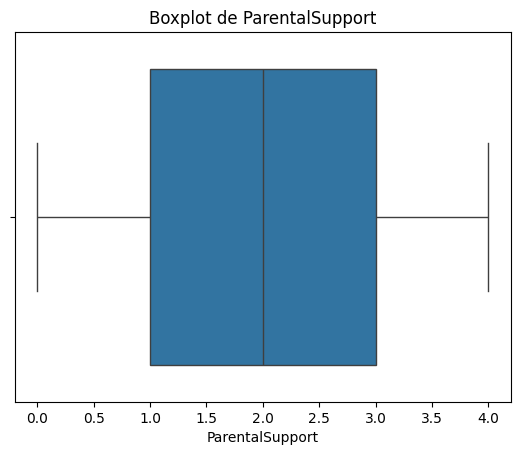

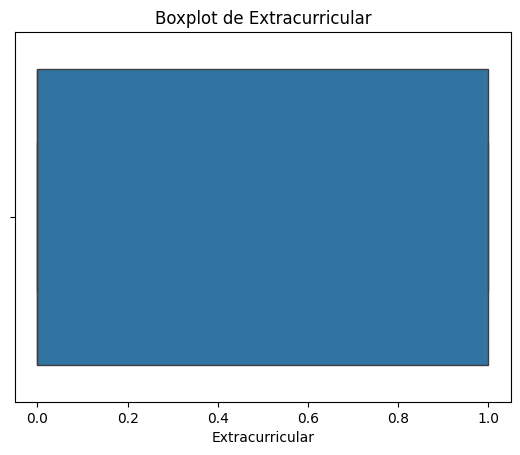

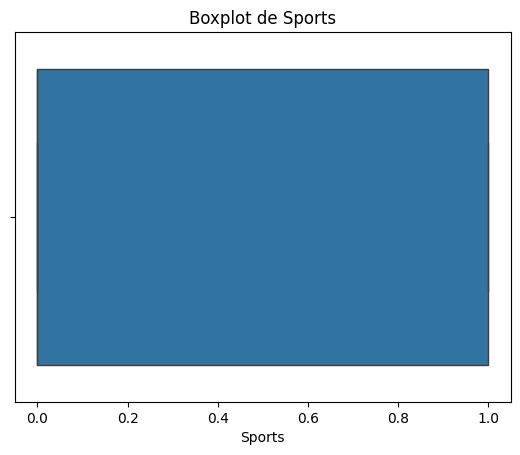

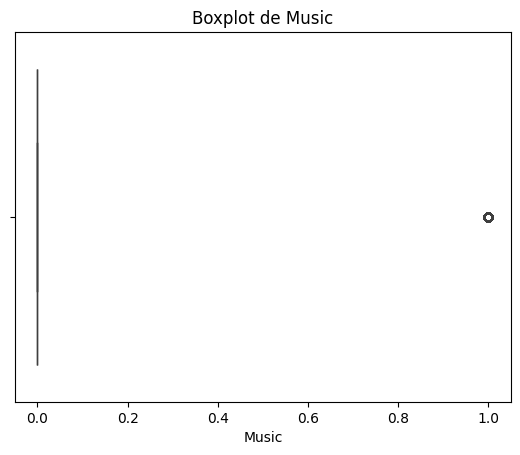

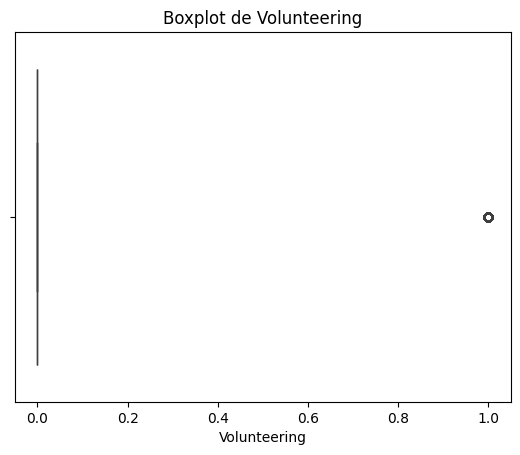

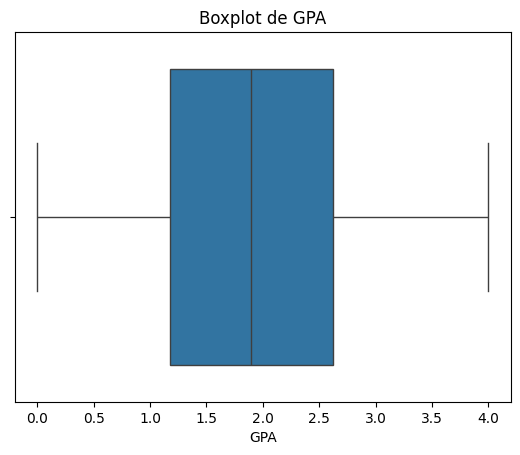

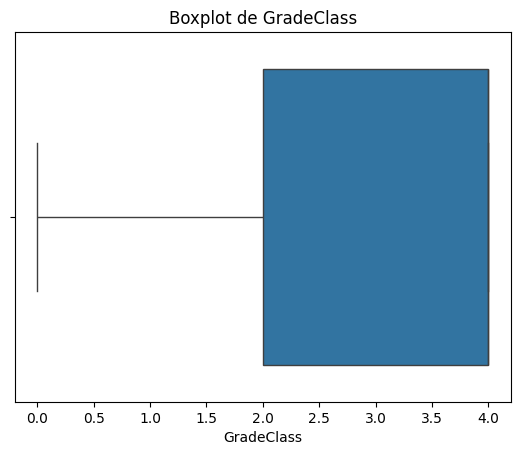

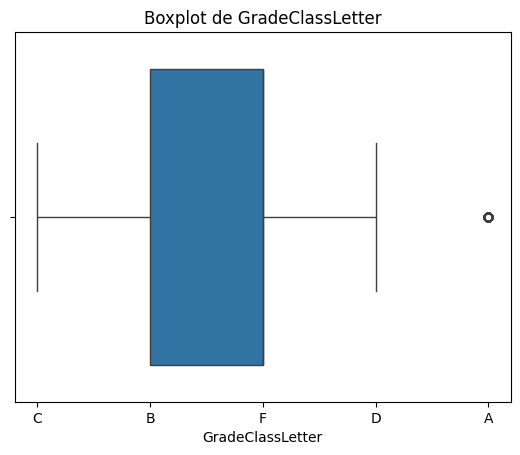

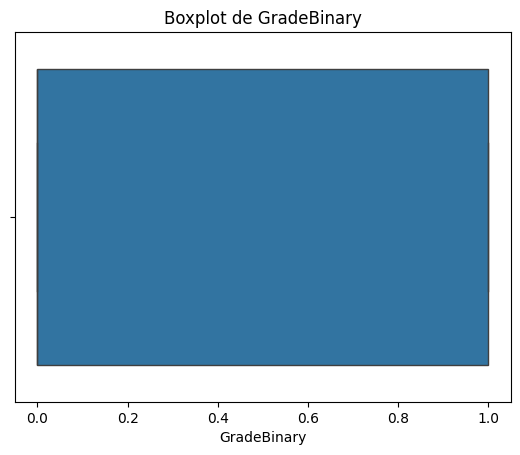

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

print(df.describe())

for coluna in df.columns:
    sns.boxplot(x=df[coluna])
    plt.title(f'Boxplot de {coluna}')
    plt.show()


Importação das bibliotecas

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, classification_report, ConfusionMatrixDisplay

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

# Modelos
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# SHAP
import shap
import matplotlib.pyplot as plt

In [ ]:
# =====================
# 1. Dados
# =====================
# df = pd.read_csv("datasets/Student_performance_data_.csv")

X = df.drop(columns=["StudentID", "GradeClass", "GPA", "GradeClassLetter", "GradeBinary"], errors='ignore')
y = df['GradeBinary']


# =====================
# 2. Split: treino, validação, teste
# =====================
X_temp, X_test, y_temp, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, stratify=y_temp, test_size=0.25, random_state=42)


In [ ]:
# =====================
# 3. Balanceamento no treino
# =====================
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

tomek = TomekLinks()
X_final, y_final = tomek.fit_resample(X_smote, y_smote)

In [ ]:
# =====================
# 4. Modelos e parâmetros
# =====================
models_and_params = {
    "RandomForest": [
        RandomForestClassifier(random_state=42),
        {
            'clf__n_estimators': [100, 200],
            'clf__criterion': ['gini', 'entropy', 'log_loss'],
            'clf__max_depth': [None, 5, 10, 20],
            'clf__min_samples_split': [2, 5],
            'clf__min_samples_leaf': [1, 2]
        }
    ],
    "KNN": [
        KNeighborsClassifier(),
        {
            'clf__n_neighbors': [3, 5, 7, 10],
            'clf__weights': ['uniform', 'distance'],
            'clf__leaf_size': [10, 20, 30],
            'clf__p': [1, 2]
        }
    ],
    "SVC": [
        SVC(probability=True, random_state=42),
        {
            'clf__C': [0.1, 1, 10],
            'clf__kernel': ['linear', 'rbf', 'poly'],
            'clf__gamma': ['scale', 'auto']
        }
    ],
    "AdaBoost": [
        AdaBoostClassifier(random_state=42),
        {
            'clf__n_estimators': [20, 50, 100, 200],
            'clf__learning_rate': [0.5, 1.0, 1.5]
        }
    ],
    "LogisticRegression": [
        LogisticRegression(max_iter=1000, random_state=42),
        {
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__penalty': ['l2'],
            'clf__solver': ['lbfgs']
        }
    ],
    "DecisionTree": [
        DecisionTreeClassifier(random_state=42),
        {
            'clf__max_depth': [None, 5, 10, 20],
            'clf__min_samples_split': [2, 5],
            'clf__criterion': ['gini', 'entropy']
        }
    ]
}

In [ ]:
# =====================
# 5. Avaliação
# =====================
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_macro = lambda est, X, y: f1_score(y, est.predict(X), average='macro')

results = []

def avaliar(modelo, X, y, nome):
    pred = modelo.predict(X)
    return {
        f"Accuracy_{nome}": accuracy_score(y, pred),
        f"Recall_{nome}": recall_score(y, pred),
        f"Precision_{nome}": precision_score(y, pred),
        f"F1-score_{nome}": f1_score(y, pred)
    }

for name, (model, param_grid) in models_and_params.items():
    print(f"\n=== GridSearchCV para {name} ===")
    pipe = Pipeline([
        ('scaler', MinMaxScaler()),
        ('clf', model)
    ])

    grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1)
    grid.fit(X_final, y_final)

    best_estimator = grid.best_estimator_

    resultado = {
        "Modelo": name,
        "BestParams": grid.best_params_,
        "F1_CV": grid.best_score_
    }
    resultado.update(avaliar(best_estimator, X_train, y_train, "Treino"))
    resultado.update(avaliar(best_estimator, X_val, y_val, "Validacao"))
    resultado.update(avaliar(best_estimator, X_test, y_test, "Teste"))

    results.append(resultado)


=== GridSearchCV para RandomForest ===

=== GridSearchCV para KNN ===

=== GridSearchCV para SVC ===

=== GridSearchCV para AdaBoost ===

=== GridSearchCV para LogisticRegression ===

=== GridSearchCV para DecisionTree ===


In [ ]:
# =====================
# 6. Exibir resultados
# =====================
df_resultados = pd.DataFrame(results).sort_values(by="F1-score_Teste", ascending=False)
df_resultados.to_csv("resultados.csv")
print("\nResumo dos modelos:")
print(df_resultados)


Resumo dos modelos:
               Modelo                                         BestParams  \
2                 SVC  {'clf__C': 10, 'clf__gamma': 'auto', 'clf__ker...   
0        RandomForest  {'clf__criterion': 'gini', 'clf__max_depth': 2...   
4  LogisticRegression  {'clf__C': 10, 'clf__penalty': 'l2', 'clf__sol...   
3            AdaBoost  {'clf__learning_rate': 0.5, 'clf__n_estimators...   
5        DecisionTree  {'clf__criterion': 'entropy', 'clf__max_depth'...   
1                 KNN  {'clf__leaf_size': 10, 'clf__n_neighbors': 10,...   

      F1_CV  Accuracy_Treino  Recall_Treino  Precision_Treino  \
2  0.880579         0.880753       0.863043          0.786139   
0  0.907668         0.986750       0.958696          1.000000   
4  0.875857         0.853556       0.854348          0.733209   
3  0.877870         0.875872       0.830435          0.792531   
5  0.877365         0.887029       0.850000          0.807851   
1  0.836334         0.991632       0.973913          1.0

In [ ]:
best_params_svc = df_resultados[df_resultados["Modelo"] == "SVC"]["BestParams"].values[0]
print(best_params_svc)

df_resultados.to_csv("resultados_modelos.csv")

{'clf__C': 10, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}



=== Análise SHAP para o melhor modelo: SVC ===


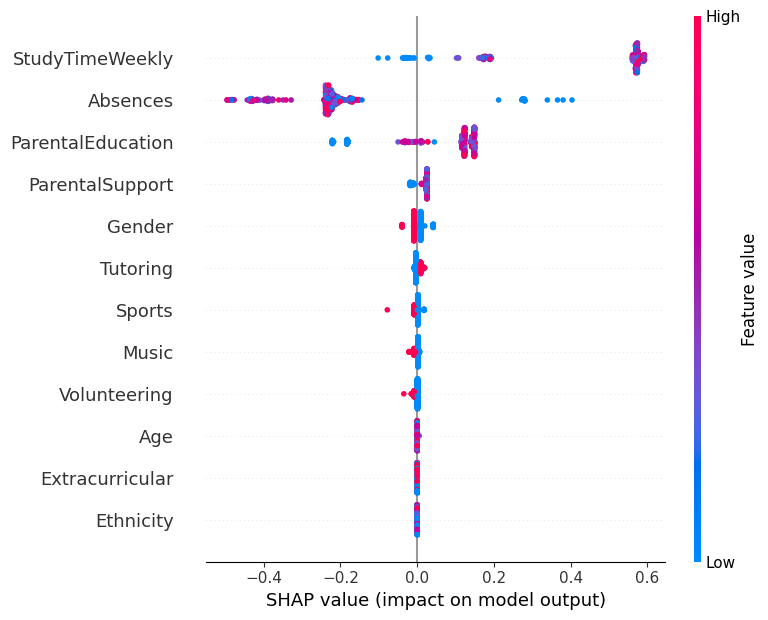

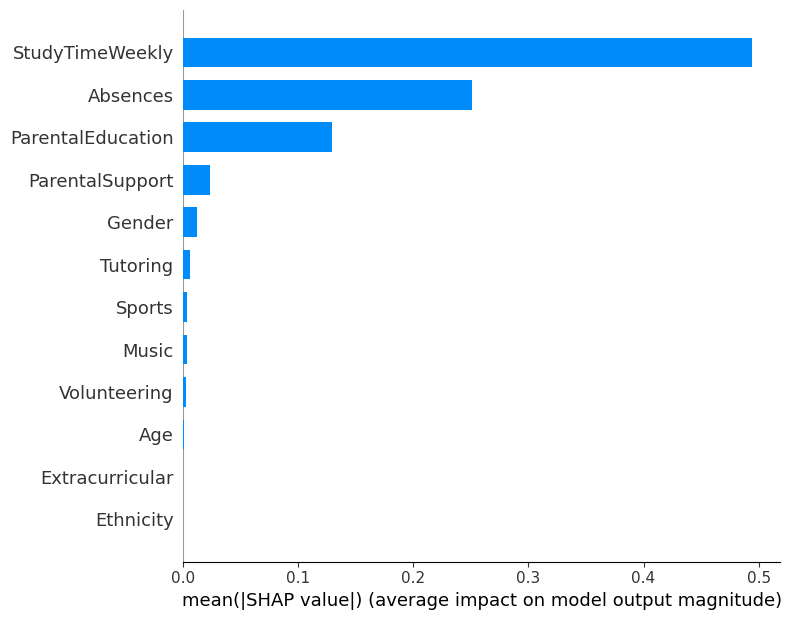

<Figure size 640x480 with 0 Axes>

In [ ]:
# =====================
# 7. SHAP com o melhor modelo
# =====================
melhor_modelo_nome = df_resultados.iloc[0]["Modelo"]
print(f"\n=== Análise SHAP para o melhor modelo: {melhor_modelo_nome} ===")

melhor_modelo = [r for r in results if r['Modelo'] == melhor_modelo_nome][0]
final_model = grid.best_estimator_.named_steps['clf']

X_sample = X_test.copy()
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_sample)

# Extrair a classe positiva corretamente (classe 1)
if isinstance(shap_values, list):
    shap_class1 = shap_values[1]
elif len(shap_values.shape) == 3:
    shap_class1 = shap_values[:, :, 1]
else:
    shap_class1 = shap_values

# Garante que shapes batem
assert shap_class1.shape == X_sample.shape

# Plota
shap.summary_plot(shap_class1, X_sample, feature_names=X_sample.columns)
plt.tight_layout()
plt.savefig("shap_summary_plot_class1.png", dpi=300)

shap.summary_plot(shap_class1, X_sample, feature_names=X_sample.columns, plot_type="bar")
plt.tight_layout()
plt.savefig("shap_bar_plot_class1.png", dpi=300)

Modelo Final


=== AVALIAÇÃO NO CONJUNTO DE TESTE ===
Accuracy : 0.8643
Recall   : 0.8377
Precision: 0.7633
F1-score : 0.7988

Relatório completo:
              precision    recall  f1-score   support

           0       0.92      0.88      0.90       325
           1       0.76      0.84      0.80       154

    accuracy                           0.86       479
   macro avg       0.84      0.86      0.85       479
weighted avg       0.87      0.86      0.87       479



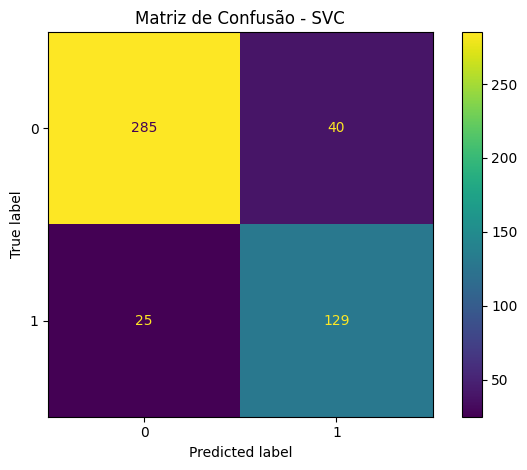

In [ ]:
# =====================
# 4. Modelo SVC com hiperparâmetros ótimos
# =====================

# {'clf__C': 10, 'clf__gamma': 'auto', 'clf__kernel': 'rbf'}
# params = {
#     'clf__C': 10,
#     'clf__gamma': 'auto',
#     'clf__kernel': 'rbf'
# }
params = best_params_svc

pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('clf', SVC(random_state=42))
])
pipe.set_params(**params)

# Treinamento
pipe.fit(X_final, y_final)

# =====================
# 5. Avaliação no teste
# =====================
y_pred = pipe.predict(X_test)

acc = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n=== AVALIAÇÃO NO CONJUNTO DE TESTE ===")
print(f"Accuracy : {acc:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"Precision: {prec:.4f}")
print(f"F1-score : {f1:.4f}")
print("\nRelatório completo:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Matriz de Confusão - SVC")
plt.tight_layout()
plt.savefig("confusion_matrix_svc.png", dpi=300)
plt.show()